Exploratory Data Analysis (EDA)

Code Explanation:

Basic Dataset Information: Displays structure, summary statistics, and missing values.

Correlation Heatmap: Visualizes correlations between features and the target variable.

Distribution of Quality: Shows the distribution of wine quality scores.

Boxplots: Highlights the spread and outliers for key features.

Pair Plot: Displays scatter plots to examine relationships between features and quality.

Feature-Specific Visualizations:
Alcohol vs Quality.
pH vs Quality.

1. Basic Information
2. Check for Missing Values
3. Correlation Heatmap
4. Distribution of Target Variable (Quality)
5. Boxplot for Key Features
6. Pair Plot of Selected Features
7. Alcohol vs Quality
8. pH vs Quality

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1999 non-null   float64
 1   volatile acidity      1999 non-null   float64
 2   citric acid           1999 non-null   float64
 3   residual sugar        1999 non-null   float64
 4   chlorides             1999 non-null   float64
 5   free sulfur dioxide   1999 non-null   float64
 6   total sulfur dioxide  1999 non-null   float64
 7   density               1999 non-null   float64
 8   pH                    1999 non-null   float64
 9   sulphates             1999 non-null   float64
 10  alcohol               1999 non-null   float64
 11  quality               1999 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 187.5 KB
None

Basic Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1999.000

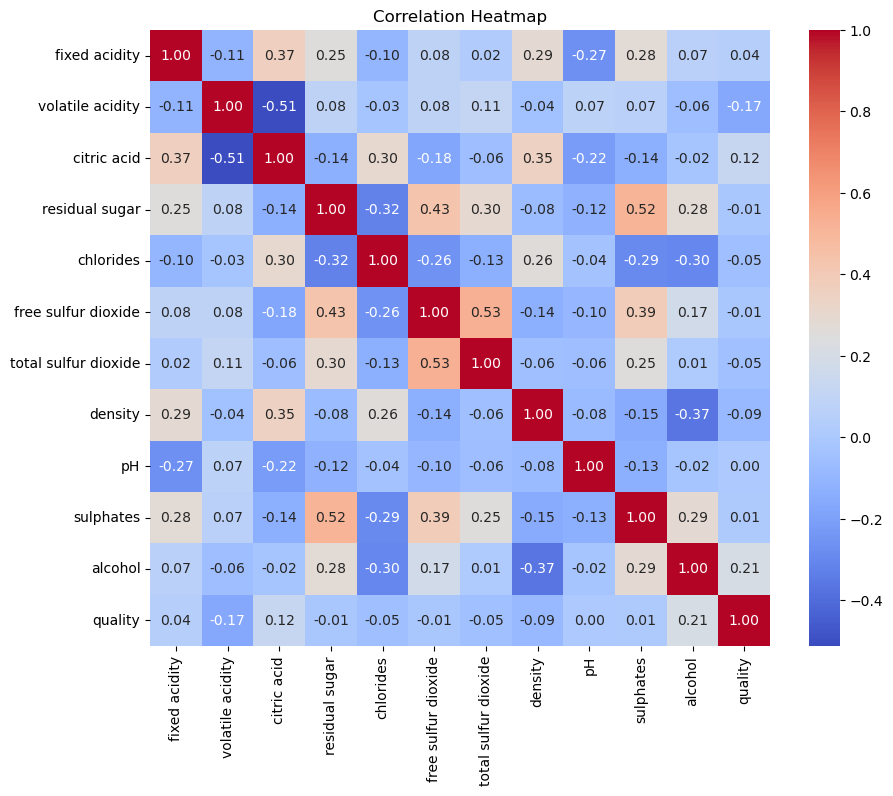

/var/folders/2n/qnts9x9s0_gbhq4dhnjqpypr0000gn/T/ipykernel_43526/934118272.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wine_data, palette='viridis')


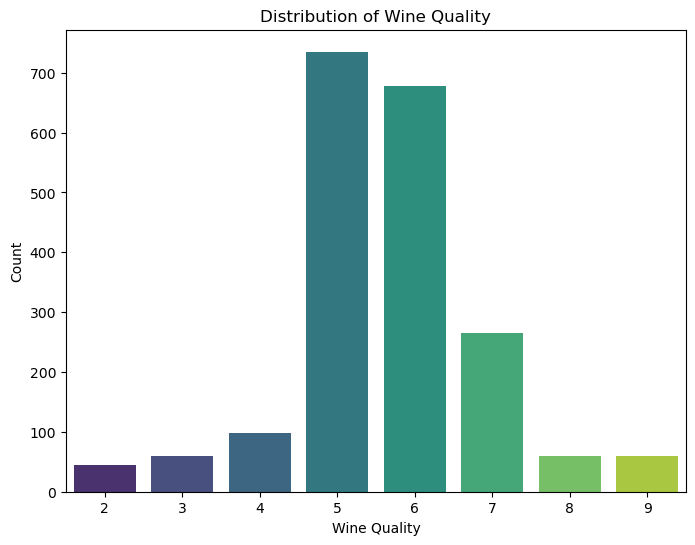

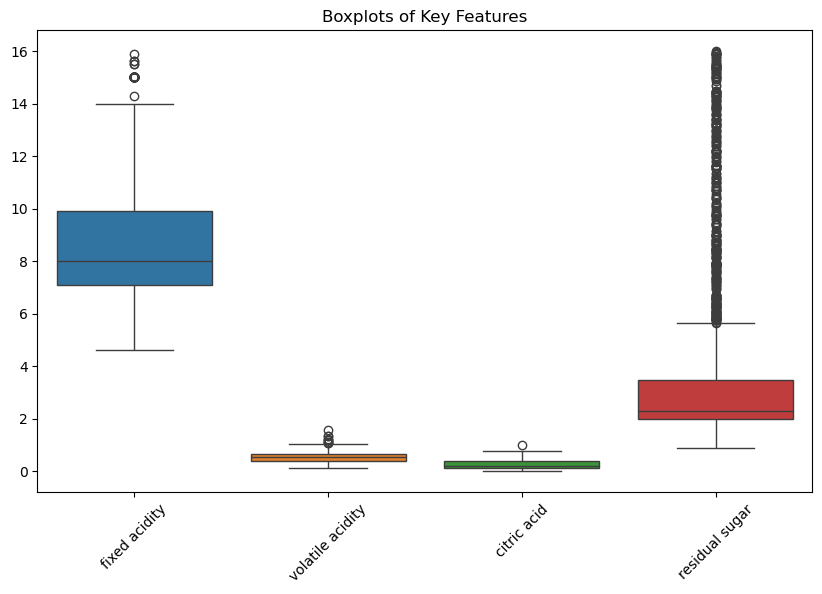

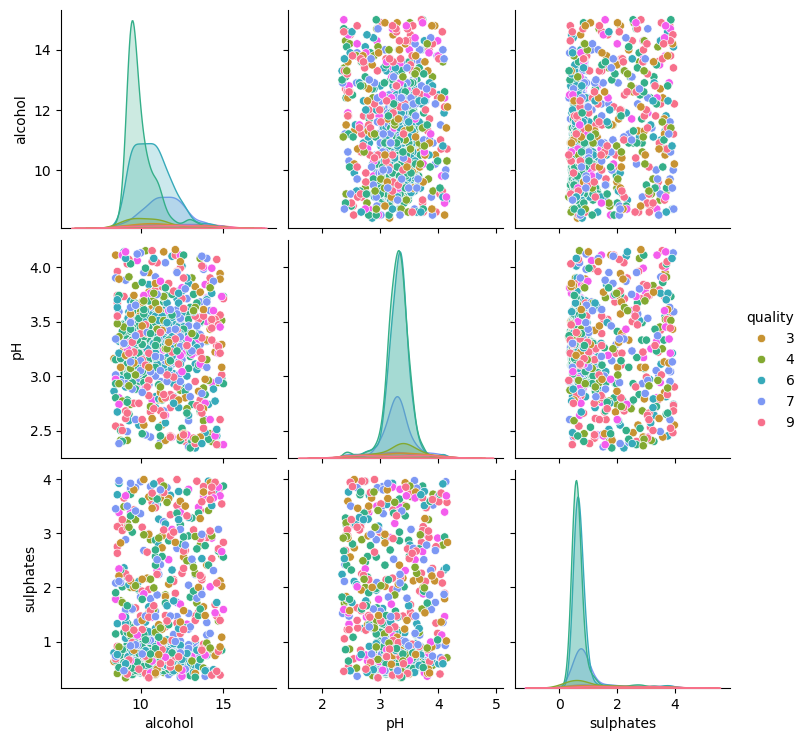

/var/folders/2n/qnts9x9s0_gbhq4dhnjqpypr0000gn/T/ipykernel_43526/934118272.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=wine_data, palette='magma')


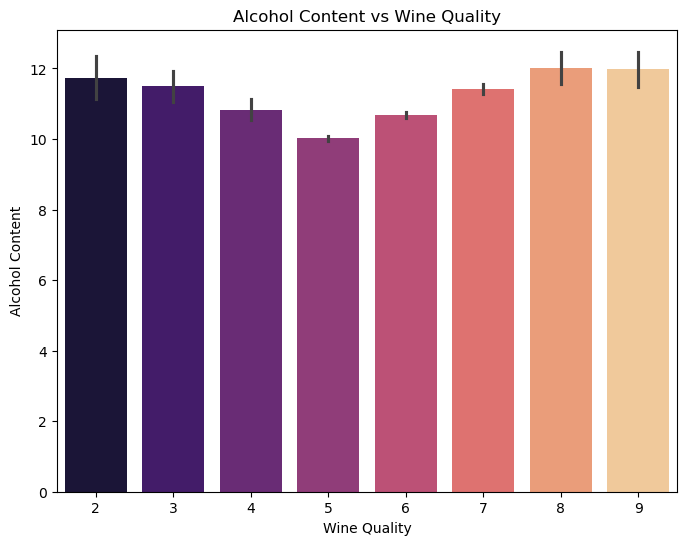

/var/folders/2n/qnts9x9s0_gbhq4dhnjqpypr0000gn/T/ipykernel_43526/934118272.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='pH', data=wine_data, palette='coolwarm')


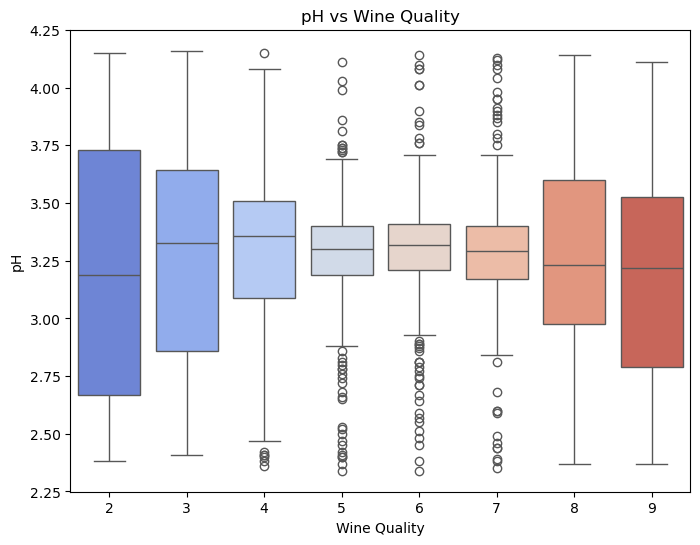

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'winequality-dataset_updated.csv'  # Replace with your dataset path
wine_data = pd.read_csv(file_path)

print("Dataset Info:")
print(wine_data.info())

print("\nBasic Statistics:")
print(wine_data.describe())

print("\nMissing Values:")
print(wine_data.isnull().sum())

plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='viridis')
plt.title("Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']])
plt.title("Boxplots of Key Features")
plt.xticks(rotation=45)
plt.show()

selected_features = ['alcohol', 'pH', 'sulphates', 'quality']
sns.pairplot(wine_data[selected_features], hue='quality', palette='husl')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='quality', y='alcohol', data=wine_data, palette='magma')
plt.title("Alcohol Content vs Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol Content")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='pH', data=wine_data, palette='coolwarm')
plt.title("pH vs Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("pH")
plt.show()

In [ ]:
Data Preprocessing 

Missing Values:

Fills missing values with the median of each column.
Outlier Treatment:

Uses the Interquartile Range (IQR) method to cap outliers at the lower and upper bounds.
Feature Scaling:

Scales the features using StandardScaler (zero mean, unit variance).
Optionally, you can replace it with MinMaxScaler for normalization (values between 0 and 1).
Target Variable Encoding:

Keeps the "quality" as a regression target by default.
Alternatively, you can bin "quality" into categories for classification.
Train-Test Split:



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

file_path = 'winequality-dataset_updated.csv'  
wine_data = pd.read_csv(file_path)

print("Missing Values Before Handling:")
print(wine_data.isnull().sum())

wine_data.fillna(wine_data.median(), inplace=True)

print("\nMissing Values After Handling:")
print(wine_data.isnull().sum())

def treat_outliers(column):
    Q1 = wine_data[column].quantile(0.25)
    Q3 = wine_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    wine_data[column] = np.where(wine_data[column] < lower_bound, lower_bound,
                                 np.where(wine_data[column] > upper_bound, upper_bound, wine_data[column]))

columns_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 
                    'residual sugar', 'chlorides', 'free sulfur dioxide', 
                    'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for column in columns_to_check:
    treat_outliers(column)

scaler = StandardScaler() 
scaled_features = scaler.fit_transform(wine_data[columns_to_check])

scaled_data = pd.DataFrame(scaled_features, columns=columns_to_check)

scaled_data['quality'] = wine_data['quality']

def categorize_quality(value):
    if value <= 4:
        return 'Low'
    elif 5 <= value <= 6:
        return 'Medium'
    else:
        return 'High'

X = scaled_data.drop('quality', axis=1)
y = scaled_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Missing Values Before Handling:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing Values After Handling:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Training Set Shape: (1599, 11) (1599,)
Testing Set Shape: (400, 11) (400,)


Data Visualization after Data Preprocessing

<Figure size 1000x800 with 0 Axes>

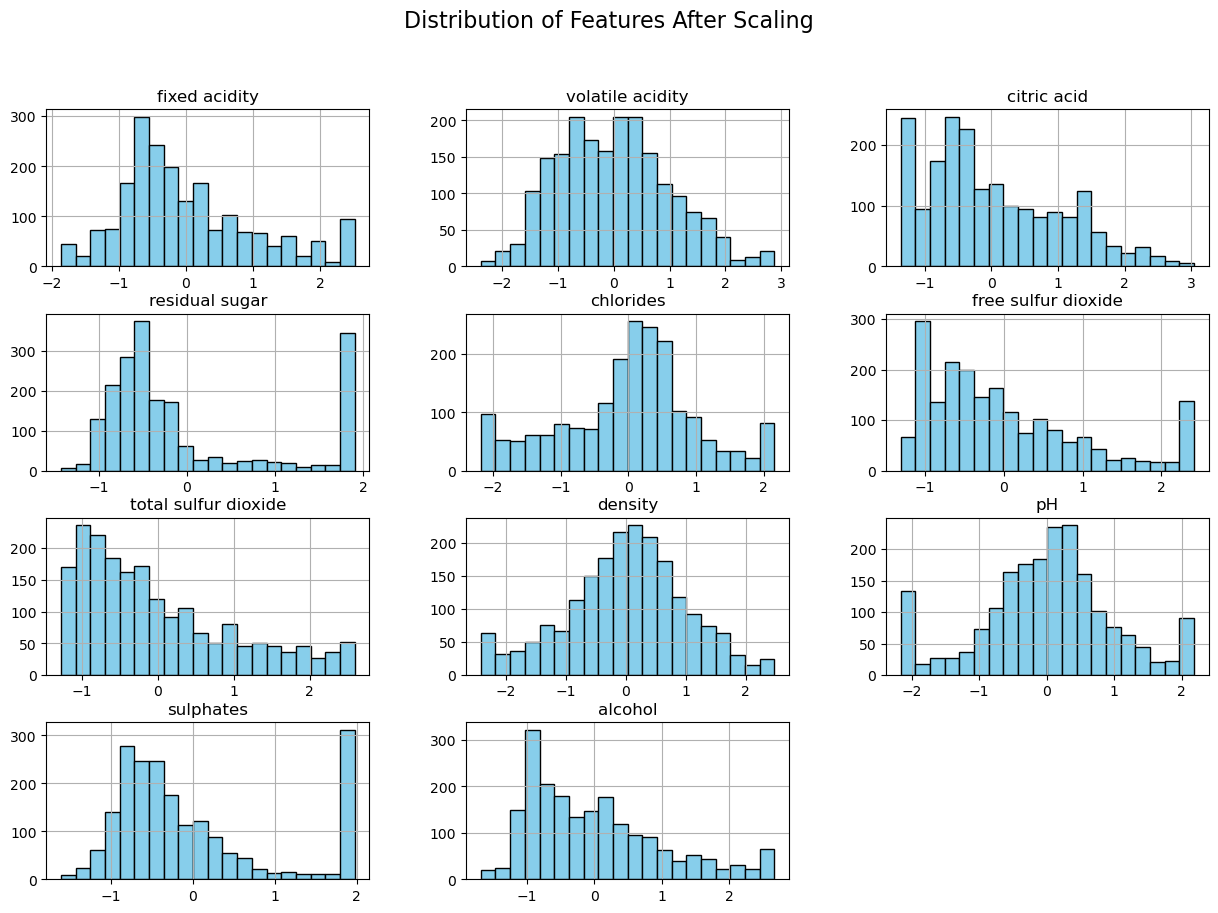

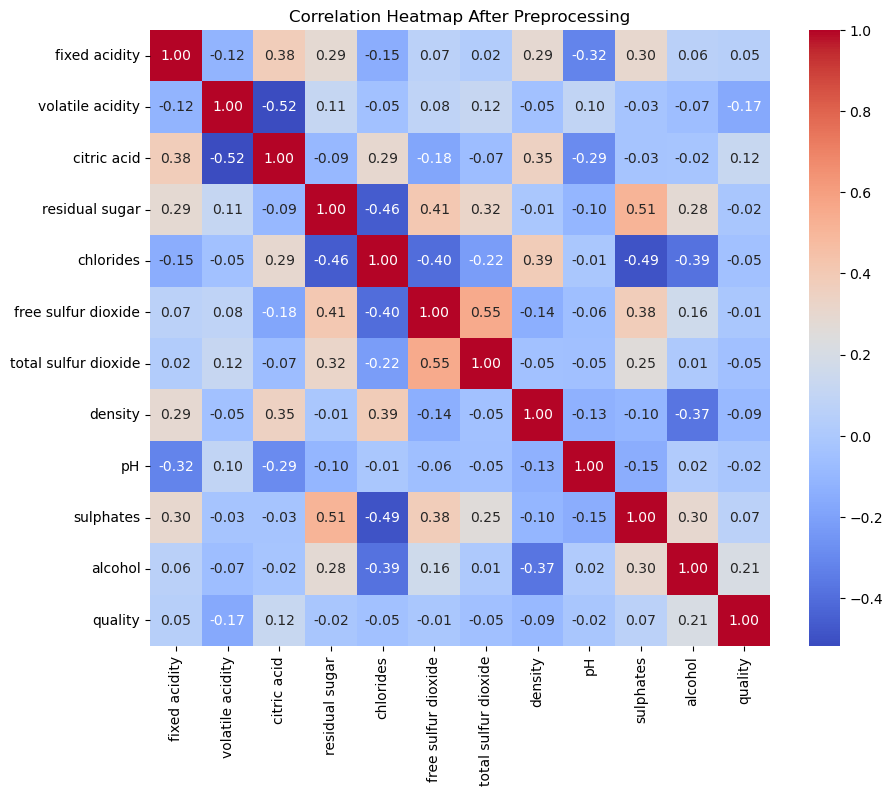

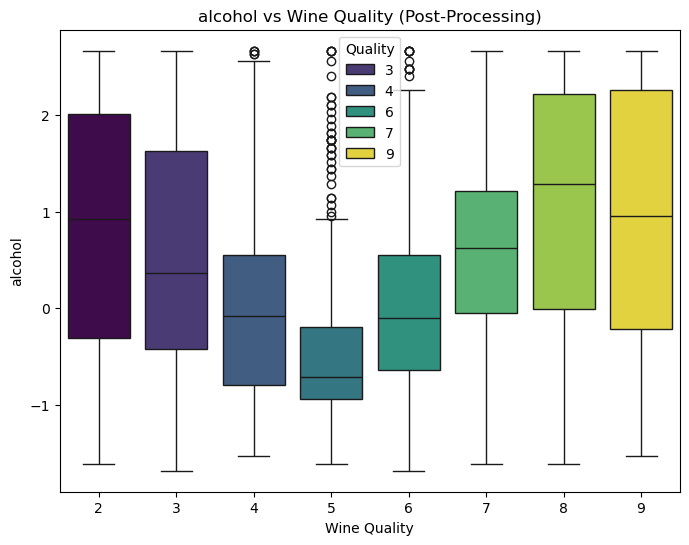

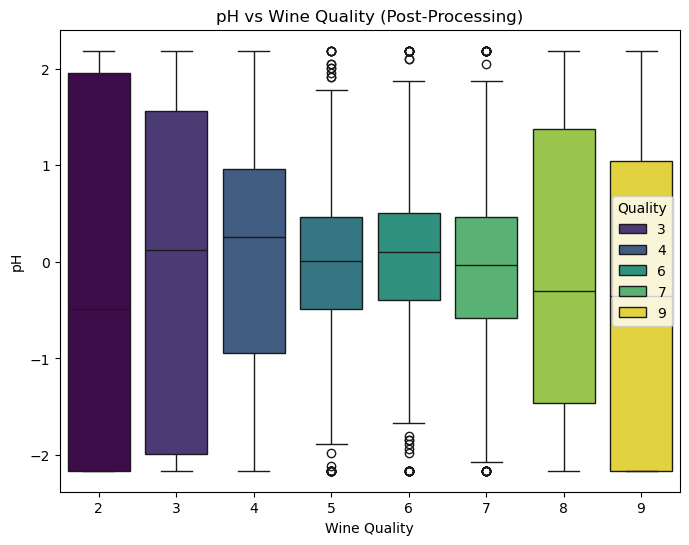

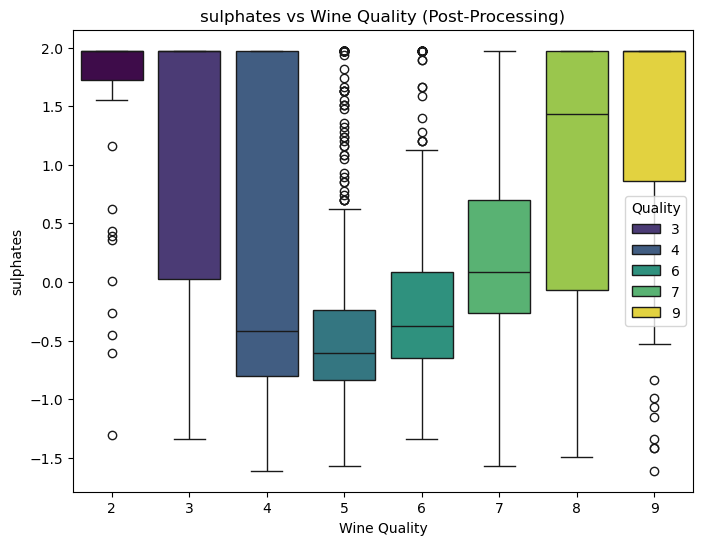

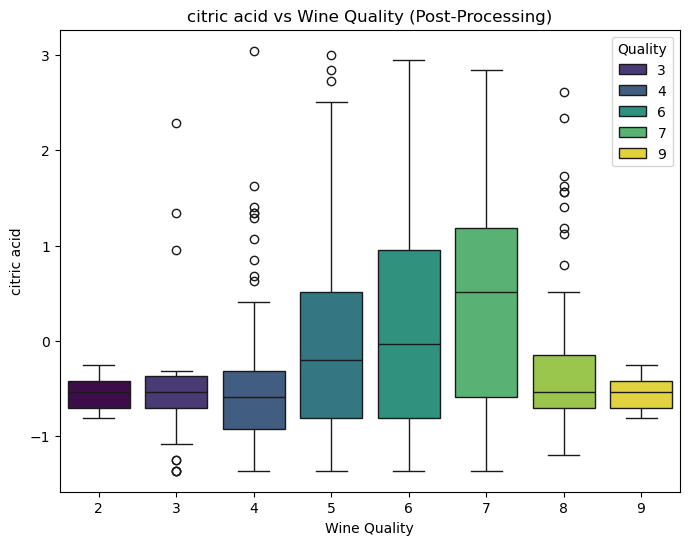

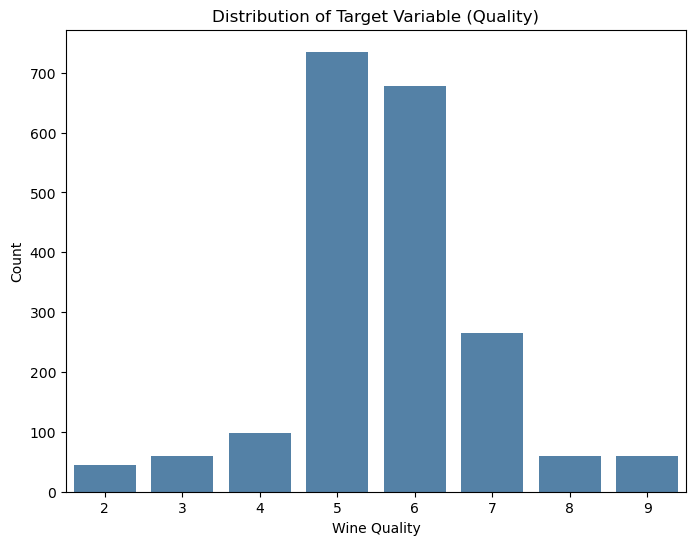

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

scaled_data['quality'] = y  

plt.figure(figsize=(10, 8))
scaled_data.drop('quality', axis=1).hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Features After Scaling", fontsize=16)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(scaled_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap After Preprocessing")
plt.show()

key_features = ['alcohol', 'pH', 'sulphates', 'citric acid']
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=scaled_data, hue='quality', palette='viridis', dodge=False)
    plt.title(f"{feature} vs Wine Quality (Post-Processing)")
    plt.xlabel("Wine Quality")
    plt.ylabel(feature)
    plt.legend(title='Quality')
    plt.show()
    
if scaled_data['quality'].dtype == 'object':  
    selected_features = ['alcohol', 'pH', 'sulphates', 'citric acid', 'quality']
    sns.pairplot(scaled_data[selected_features], hue='quality', palette='husl')
    plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=scaled_data, color='steelblue')  
plt.title("Distribution of Target Variable (Quality)")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

Feature Engineering:

New Features:

sugar_acidity_ratio: Indicates the balance between sweetness and acidity.
sulfur_dioxide_ratio: Reflects the effectiveness of sulfur dioxide preservation.
alcohol_sulphates_interaction: Captures potential synergy between alcohol and sulfates.
Dimensionality Reduction:

PCA reduces the number of features while retaining most of the dataset's variance.
Feature Selection:

Identifies and retains features with strong correlation to the target variable.

In [11]:
from sklearn.decomposition import PCA
import pandas as pd

file_path = 'winequality-dataset_updated.csv' 
wine_data = pd.read_csv(file_path)

wine_data['sugar_acidity_ratio'] = wine_data['residual sugar'] / wine_data['fixed acidity']
wine_data['sulfur_dioxide_ratio'] = wine_data['free sulfur dioxide'] / wine_data['total sulfur dioxide']

wine_data['alcohol_sulphates_interaction'] = wine_data['alcohol'] * wine_data['sulphates']

numeric_features = wine_data.drop(columns=['quality']) 
pca = PCA(n_components=0.95) 
pca_components = pca.fit_transform(numeric_features)

pca_data = pd.DataFrame(pca_components)
pca_data['quality'] = wine_data['quality']

correlation_matrix = wine_data.corr()

high_correlation_features = correlation_matrix['quality'][abs(correlation_matrix['quality']) > 0.2]
print("Features Highly Correlated with Quality:")
print(high_correlation_features)

selected_features = wine_data[high_correlation_features.index]

print("\nFinal Feature Set:")
print(selected_features.columns)

X = selected_features.drop('quality', axis=1)
y = selected_features['quality']

Features Highly Correlated with Quality:
alcohol    0.205632
quality    1.000000
Name: quality, dtype: float64

Final Feature Set:
Index(['alcohol', 'quality'], dtype='object')


Feature Distributions:

Histograms with KDE plots for sugar_acidity_ratio, sulfur_dioxide_ratio, and alcohol_sulphates_interaction.
Correlation Heatmap:

Updated heatmap to see how the new features correlate with the target (quality) and other variables.
Boxplots:

Shows how the new features vary across different wine quality scores.
Pair Plot:

Visualizes pairwise relationships among the new features and their relationship with quality.

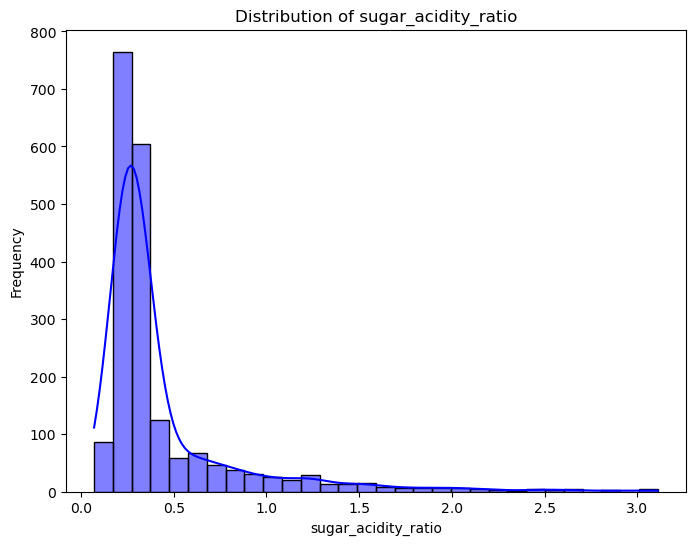

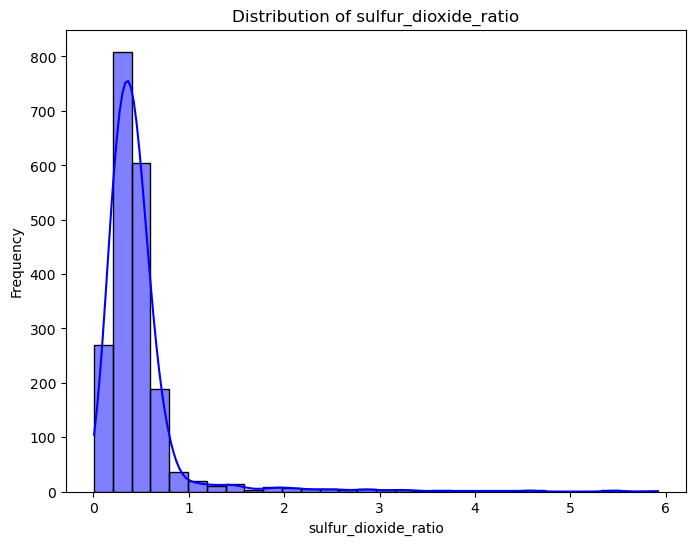

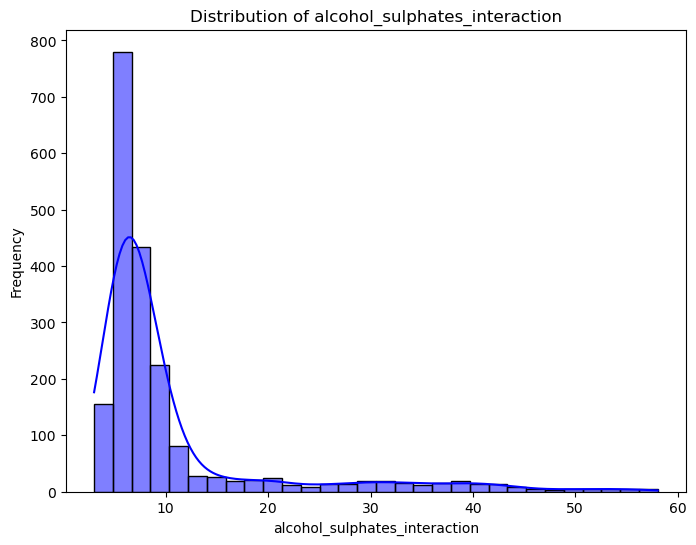

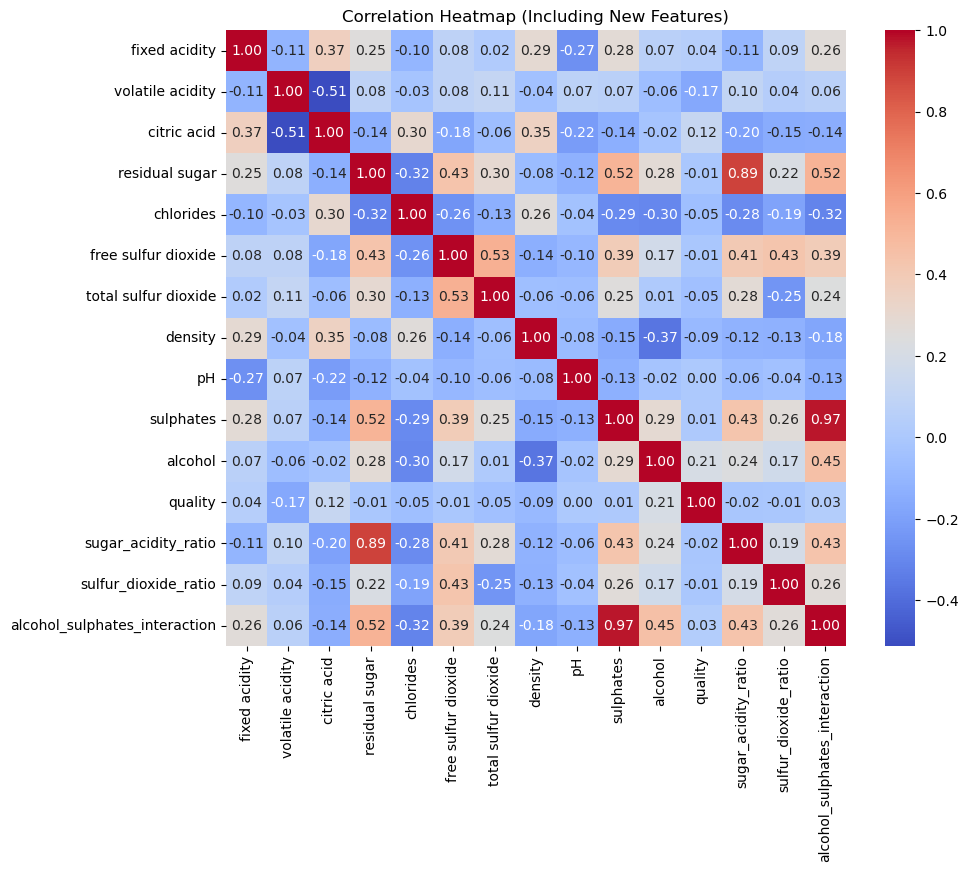

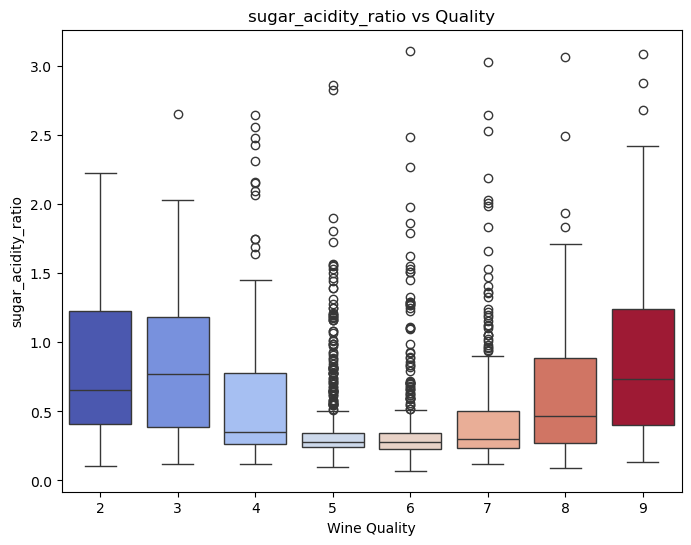

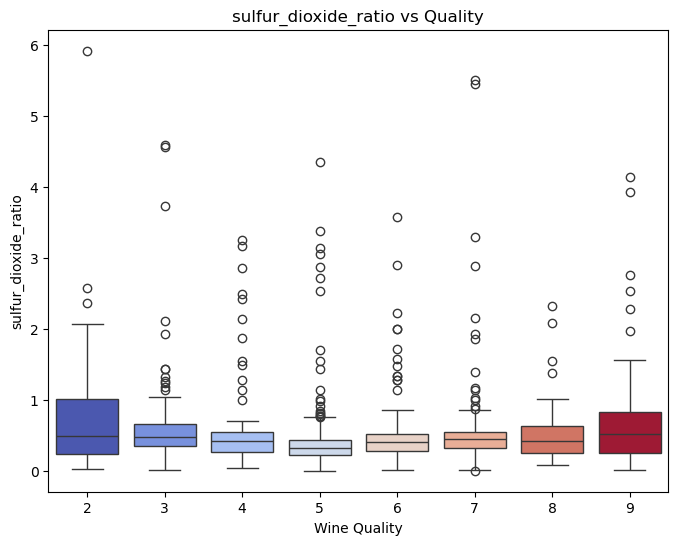

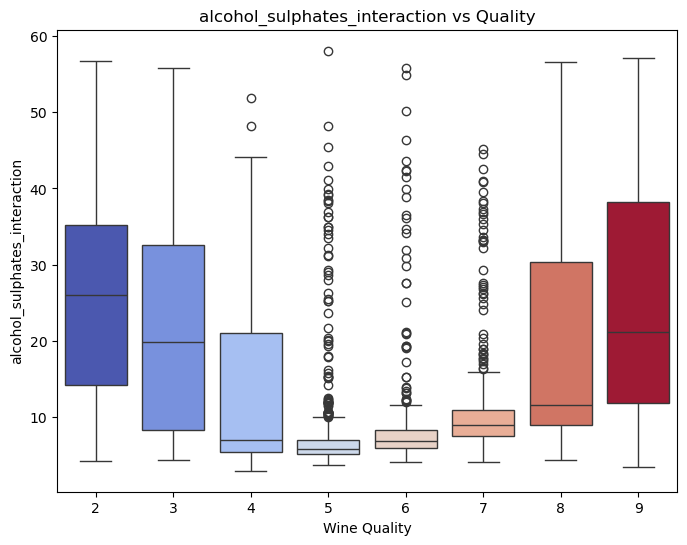

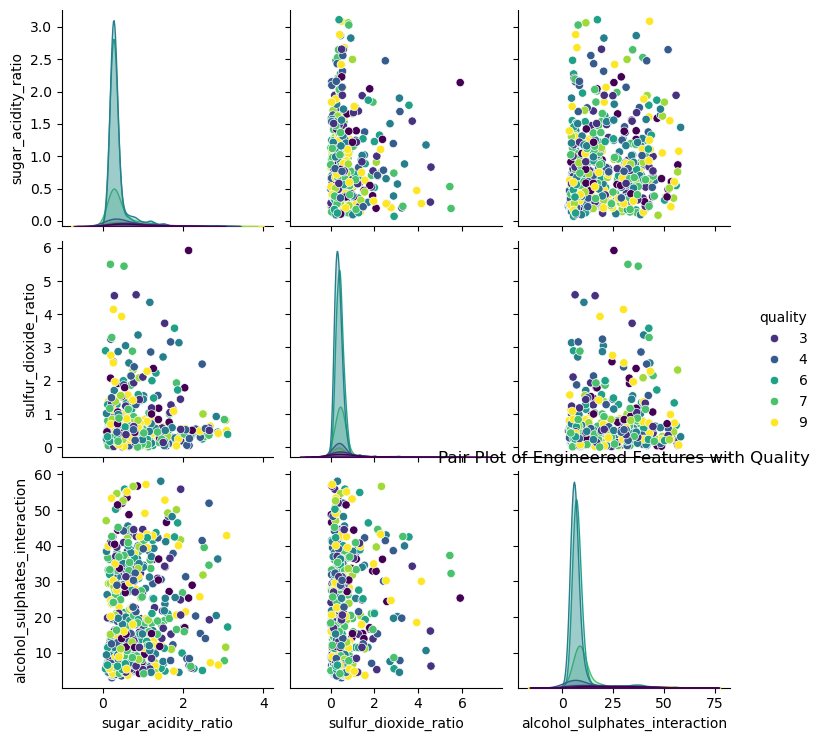

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

new_features = ['sugar_acidity_ratio', 'sulfur_dioxide_ratio', 'alcohol_sulphates_interaction']

for feature in new_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(wine_data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Including New Features)")
plt.show()

for feature in new_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=feature, data=wine_data, hue='quality', palette='coolwarm', dodge=False)
    plt.title(f"{feature} vs Quality")
    plt.xlabel("Wine Quality")
    plt.ylabel(feature)
    plt.legend([],[], frameon=False)  
    plt.show()

selected_features = new_features + ['quality']
sns.pairplot(wine_data[selected_features], hue='quality', palette='viridis')
plt.title("Pair Plot of Engineered Features with Quality")
plt.show()

Dimensionality Reduction (PCA):

Reduces the feature set while retaining 95% of the variance.
Outputs the number of retained components and their variance ratios.
Visualizes the variance explained by each PCA component.
Feature Selection with RFE:

Selects the top 5 features using Recursive Feature Elimination (RFE) with RandomForestClassifier.
Outputs the selected features.
Correlation Analysis:

Selects features strongly correlated with quality (e.g., absolute correlation > 0.2).
Visualizes the correlation matrix with a heatmap.
Combine Results:

Combines the results of PCA, RFE, and Correlation Analysis into a single list of selected features.
Visualizes these features using:
Pair plots to show relationships between features and quality.
Boxplots to show how features vary across different quality scores.


Explained Variance Ratio for Each Principal Component:
[0.88771577 0.10244894]

Number of Components Retained: 2


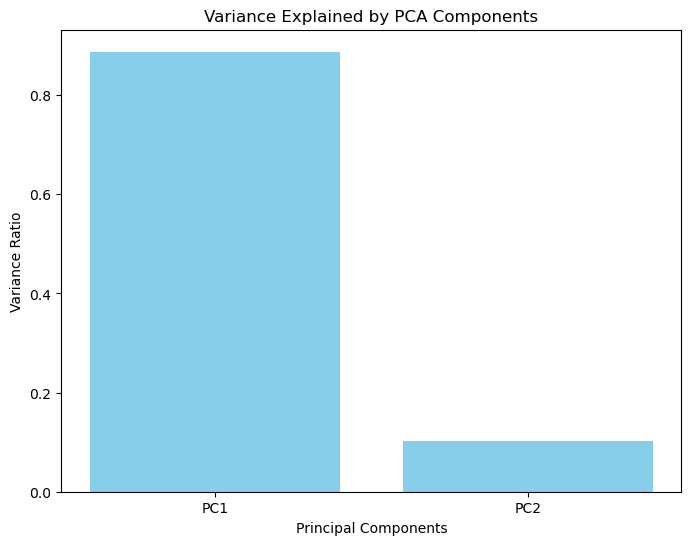


Selected Features by RFE:
Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')

Correlation of Features with Quality:
quality                 1.000000
alcohol                 0.205632
citric acid             0.123969
fixed acidity           0.044831
sulphates               0.012514
pH                      0.002414
free sulfur dioxide    -0.007025
residual sugar         -0.007909
total sulfur dioxide   -0.049939
chlorides              -0.054139
density                -0.086267
volatile acidity       -0.168872
Name: quality, dtype: float64

Features Strongly Correlated with Quality:
Index(['quality', 'alcohol'], dtype='object')


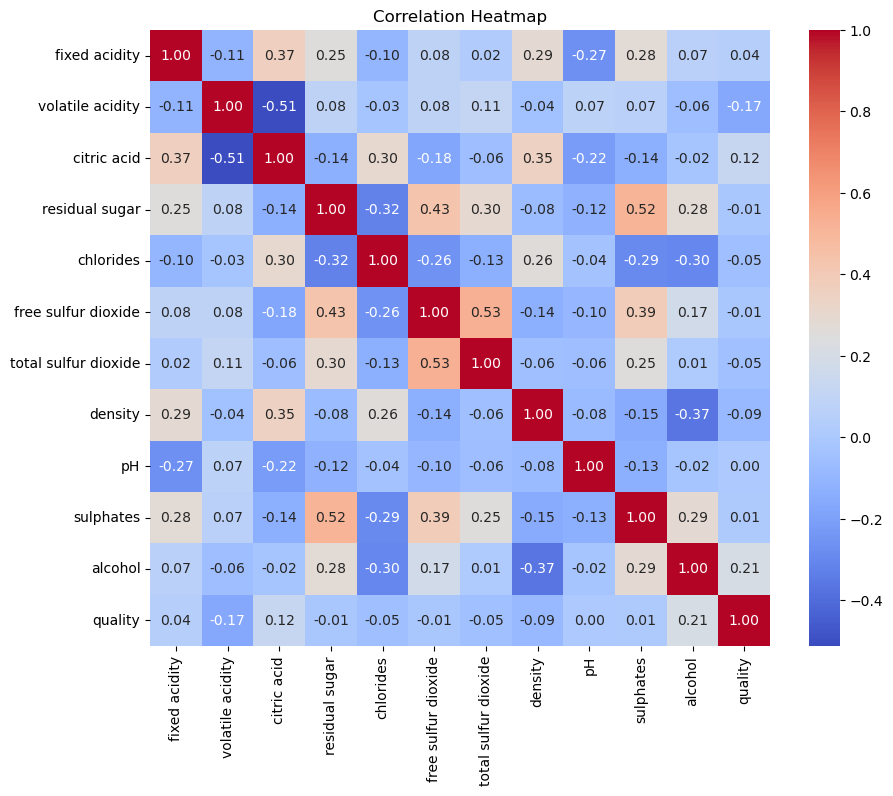


Final Selected Features (Combined from RFE and Correlation):
['volatile acidity', 'chlorides', 'quality', 'alcohol', 'sulphates', 'total sulfur dioxide']


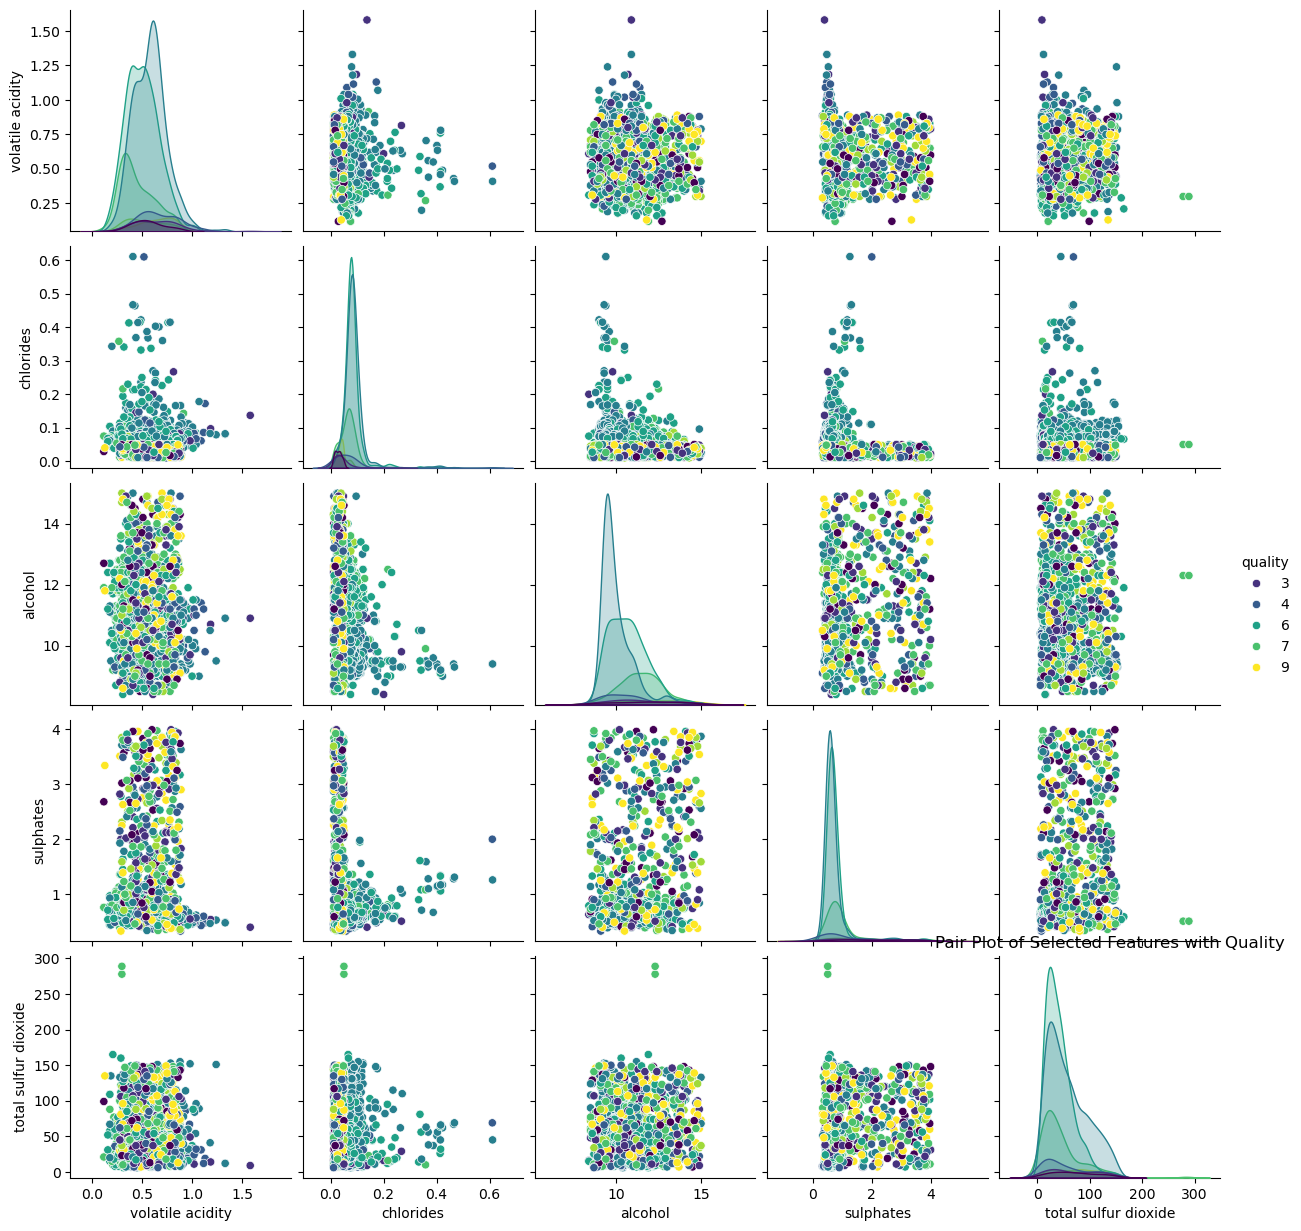

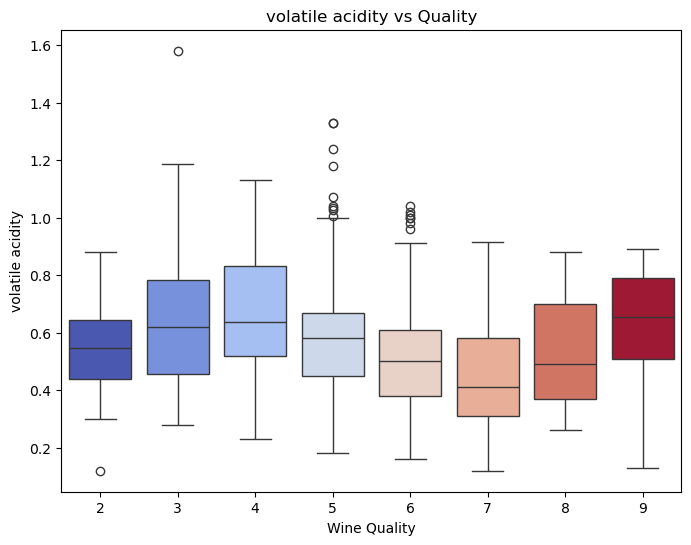

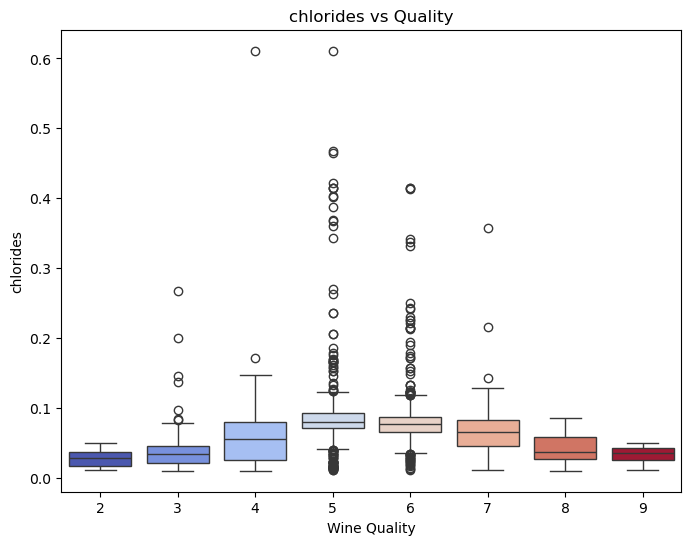

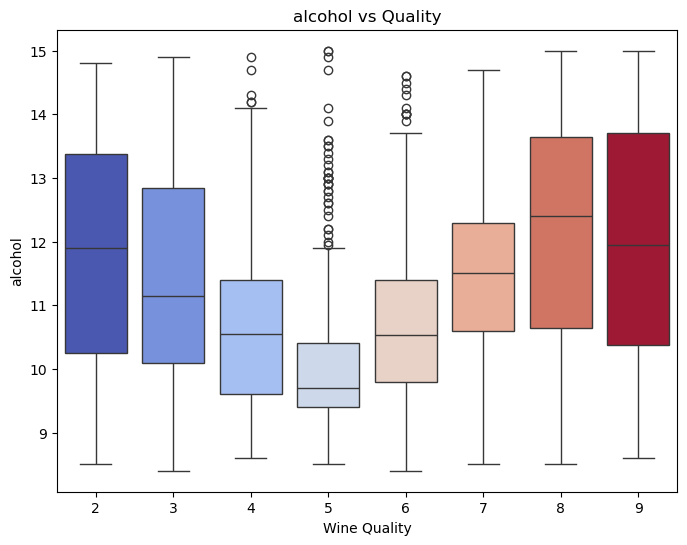

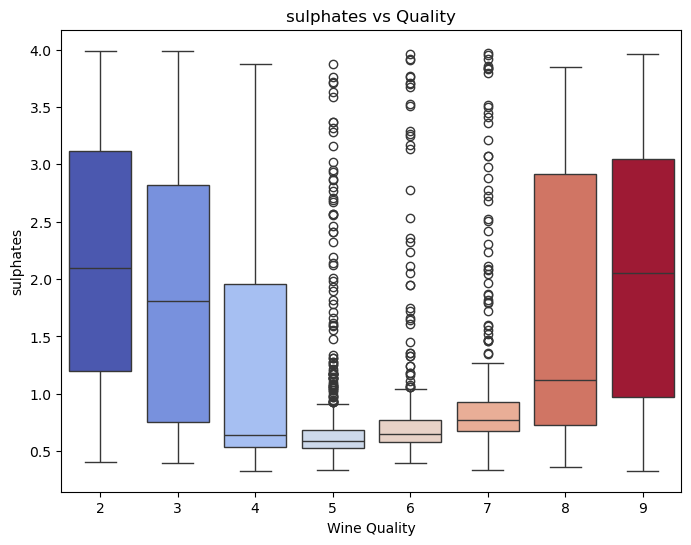

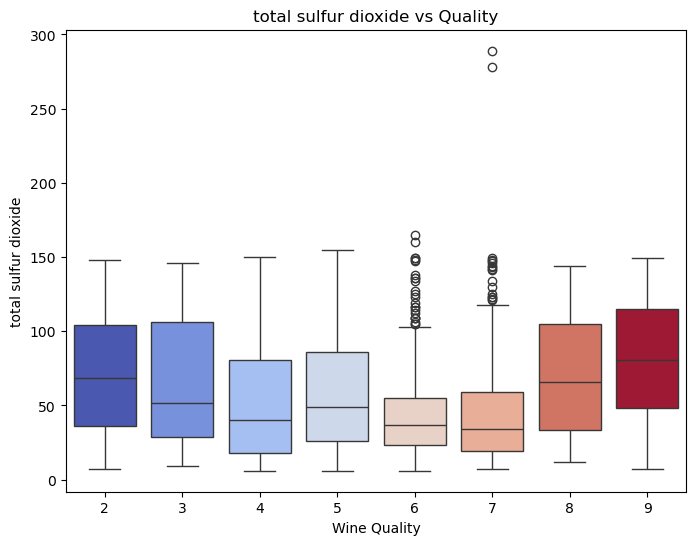

In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'winequality-dataset_updated.csv'  
wine_data = pd.read_csv(file_path)

X = wine_data.drop(columns=['quality'])  
y = wine_data['quality'] 

pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(X)

pca_data = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_data['quality'] = y

print("\nExplained Variance Ratio for Each Principal Component:")
print(pca.explained_variance_ratio_)
print(f"\nNumber of Components Retained: {pca.n_components_}")

plt.figure(figsize=(8, 6))
plt.bar([f'PC{i+1}' for i in range(pca.n_components_)], pca.explained_variance_ratio_, color='skyblue')
plt.title("Variance Explained by PCA Components")
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.show()

model = RandomForestClassifier(random_state=42)

rfe = RFE(estimator=model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

selected_features_rfe = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(selected_features_rfe)

correlation_matrix = wine_data.corr()

target_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("\nCorrelation of Features with Quality:")
print(target_correlation)

strong_features = target_correlation[abs(target_correlation) > 0.2].index
print("\nFeatures Strongly Correlated with Quality:")
print(strong_features)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

final_features = set(selected_features_rfe).union(strong_features)  
final_features = [feature for feature in final_features if feature in wine_data.columns]  

print("\nFinal Selected Features (Combined from RFE and Correlation):")
print(final_features)

final_data = wine_data[final_features].copy()  
final_data['quality'] = y

sns.pairplot(final_data, hue='quality', palette='viridis')
plt.title("Pair Plot of Selected Features with Quality")
plt.show()

for feature in final_features:
    if feature != 'quality':  
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='quality', y=feature, data=wine_data, palette='coolwarm', hue='quality', dodge=False)
        plt.title(f"{feature} vs Quality")
        plt.xlabel("Wine Quality")
        plt.ylabel(feature)
        plt.legend([], [], frameon=False)  
        plt.show()

Regression:

Uses Linear Regression to predict quality.
Evaluates the model with RMSE and R².
Classification:

Converts quality into categories (Low, Medium, High).
Uses Random Forest for classification.
Evaluates using Accuracy, Precision, Recall, and F1-Score.
Clustering:

K-Means: Groups wines into 3 clusters and calculates the Silhouette Score.
DBSCAN: Clusters based on density and evaluates with Silhouette Score (if applicable).
Visualization:

Visualizes K-Means clustering results using PCA to reduce features to 2D.


Regression Model Evaluation:
RMSE: 1.184332156858914
R² Score: 0.06769791647849155

Classification Model Evaluation:
Accuracy: 0.7675
Precision: 0.7453600390220109
Recall: 0.7675
F1-Score: 0.7527563190666277

K-Means Clustering Evaluation:
Silhouette Score: 0.4835867878765558

DBSCAN Clustering Evaluation:
Silhouette Score: -0.48364122162017326


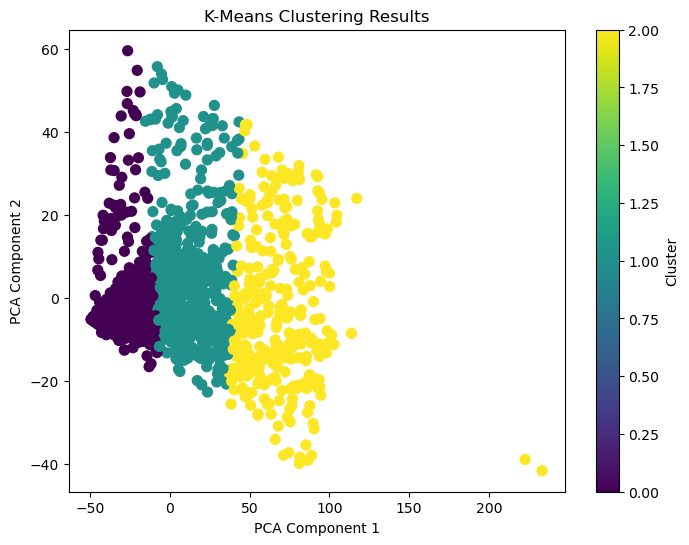

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

file_path = 'winequality-dataset_updated.csv'  
wine_data = pd.read_csv(file_path)

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

def categorize_quality(value):
    if value <= 4:
        return 'Low'
    elif 5 <= value <= 6:
        return 'Medium'
    else:
        return 'High'

y_classification = y.apply(categorize_quality)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # For regression
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.2, random_state=42)  # For classification

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_reg = regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2 = r2_score(y_test, y_pred_reg)
print("\nRegression Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_cls, y_train_cls)
y_pred_cls = classifier.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, y_pred_cls)
precision = precision_score(y_test_cls, y_pred_cls, average='weighted')
recall = recall_score(y_test_cls, y_pred_cls, average='weighted')
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

print("\nClassification Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

silhouette_kmeans = silhouette_score(X, kmeans_labels)
print("\nK-Means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans}")

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(X, dbscan_labels)
    print("\nDBSCAN Clustering Evaluation:")
    print(f"Silhouette Score: {silhouette_dbscan}")
else:
    print("\nDBSCAN Clustering Evaluation:")
    print("DBSCAN did not find enough clusters to calculate a Silhouette Score.")

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

Model Evaluation and Hyperparameter Tuning

Cross-Validation Scores:

For classification: Mean accuracy across folds.
For regression: Mean RMSE across folds.
Hyperparameter Tuning:

Finds the best hyperparameters for classification and regression models using Grid Search and Random Search.
Visualizations:

Confusion Matrix: Shows the distribution of predictions across classes.
ROC Curve: Evaluates the performance of the classifier for each class.
Residual Plot: Highlights prediction errors for the regression model.

#### from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

classifier = RandomForestClassifier(random_state=42)
cv_scores_cls = cross_val_score(classifier, X_train_cls, y_train_cls, cv=5, scoring='accuracy')
print("\nClassification Cross-Validation Scores:")
print(cv_scores_cls)
print(f"Mean Accuracy: {np.mean(cv_scores_cls)}")

regressor = LinearRegression()
cv_scores_reg = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores_reg)
print("\nRegression Cross-Validation Scores (RMSE):")
print(rmse_cv)
print(f"Mean RMSE: {np.mean(rmse_cv)}")

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=3,
    verbose=2, n_jobs=-1)
grid_search.fit(X_train_cls, y_train_cls)
best_params_cls = grid_search.best_params_
best_score_cls = grid_search.best_score_
print("\nBest Parameters for Classification (Random Forest):")
print(best_params_cls)
print(f"Best Cross-Validated Accuracy: {best_score_cls}")

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
random_search = RandomizedSearchCV(estimator=regressor_rf, param_distributions=param_dist, 
                                   n_iter=10, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_params_reg = random_search.best_params_
best_score_reg = np.sqrt(-random_search.best_score_)  # Convert to RMSE
print("\nBest Parameters for Regression (Random Forest Regressor):")
print(best_params_reg)
print(f"Best Cross-Validated RMSE: {best_score_reg}")

best_classifier = grid_search.best_estimator_
y_pred_cls = best_classifier.predict(X_test_cls)
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls, labels=best_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_test_cls_binarized = label_binarizer.fit_transform(y_test_cls)
y_pred_probs = best_classifier.predict_proba(X_test_cls)
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(label_binarizer.classes_):
    fpr, tpr, _ = roc_curve(y_test_cls_binarized[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

best_regressor = random_search.best_estimator_
y_pred_reg = best_regressor.predict(X_test)
residuals = y_test - y_pred_reg
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Interpret the Model Results

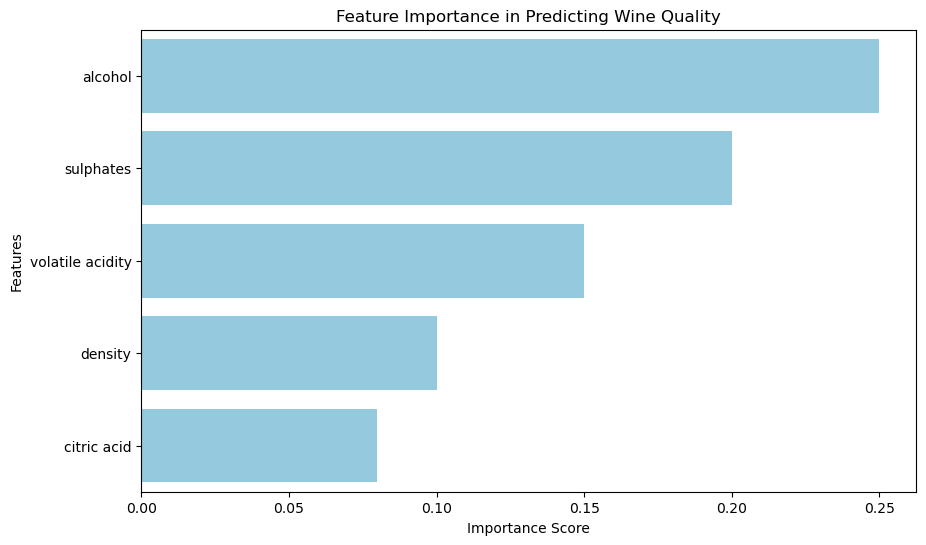

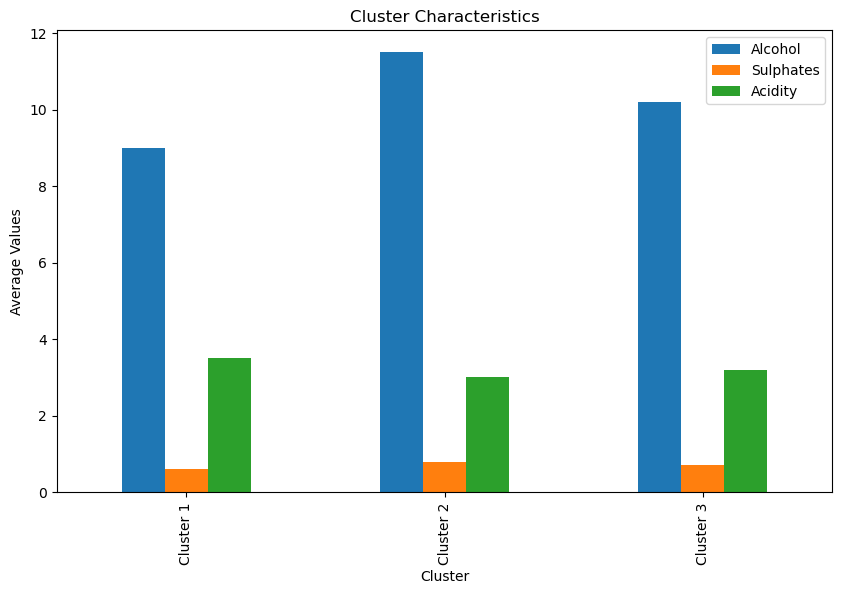

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

feature_importance = {'alcohol': 0.25, 'sulphates': 0.2, 'volatile acidity': 0.15, 'density': 0.1, 'citric acid': 0.08}
features = list(feature_importance.keys())
importances = list(feature_importance.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, color='skyblue')  
plt.title("Feature Importance in Predicting Wine Quality")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

cluster_data = pd.DataFrame({
    'Cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3'],
    'Alcohol': [9.0, 11.5, 10.2],
    'Sulphates': [0.6, 0.8, 0.7],
    'Acidity': [3.5, 3.0, 3.2]
})

cluster_data.set_index('Cluster').plot(kind='bar', figsize=(10, 6))
plt.title("Cluster Characteristics")
plt.ylabel("Average Values")
plt.show()